In [1]:
# นำเข้าไลบรารีที่จำเป็น
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [2]:
# 1. โหลดข้อมูล Breast Cancer Dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target


In [9]:
# show me how X data look like including collumn name
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()




,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#Give me the diffination on each collumn
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
#show me y data look like including collumn name
import pandas as pd
df = pd.DataFrame(cancer.target, columns=['target'])
df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [12]:
# show me the meaning of target for what is 0 and 1
print(cancer.target_names)

['malignant' 'benign']


In [6]:
#Checking null valuse for all cullumn
df.isnull().sum()


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [13]:

# 2. แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:

# 3. ปรับสเกลข้อมูล (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:

# 4. สร้างโมเดล SVM แบบเริ่มต้น (Linear Kernel)
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [16]:

# 5. ทำนายผลลัพธ์
y_pred = model.predict(X_test_scaled)



In [19]:
#5.1 หาค่า Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


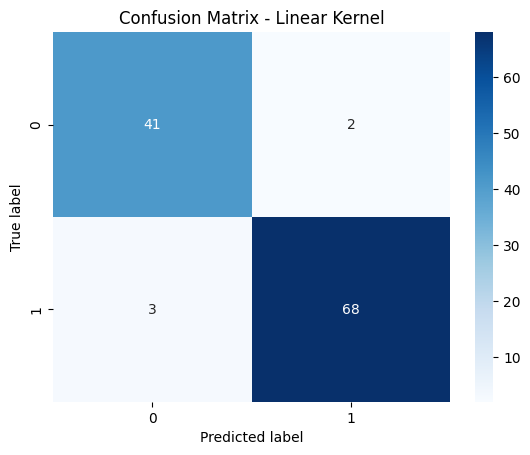

In [17]:
# 6. แสดงผลลัพธ์ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Linear Kernel')
plt.show()


In [18]:

# 7. แสดงผลรายงานการจำแนกประเภท
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

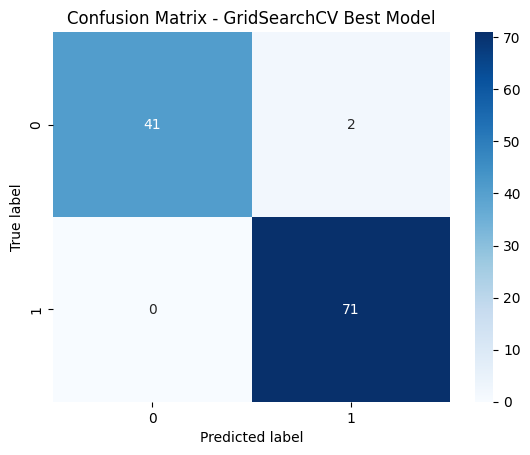

In [20]:
# นำเข้าไลบรารีที่จำเป็น
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# กำหนดพารามิเตอร์ที่ต้องการค้นหาด้วย GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],           # ทดสอบค่า C ในช่วงต่างๆ
              'gamma': [1, 0.1, 0.01, 0.001],   # ทดสอบค่า gamma สำหรับ RBF Kernel
              'kernel': ['linear', 'poly', 'rbf']}  # ทดสอบ kernel แบบ linear, polynomial, และ rbf

# สร้างโมเดล SVC และใช้ GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train_scaled, y_train)

# แสดงผลลัพธ์ของพารามิเตอร์ที่ดีที่สุด
print("Best parameters found: ", grid.best_params_)

# ทำนายผลลัพธ์ด้วยโมเดลที่ดีที่สุด
grid_predictions = grid.predict(X_test_scaled)

# แสดง Confusion Matrix และรายงานประสิทธิภาพ
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

# แสดงผล Confusion Matrix ด้วย Heatmap
cm_grid = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - GridSearchCV Best Model')
plt.show()


# New Data for Testing Model

In [21]:
# สมมุติว่าคุณมีข้อมูลใหม่ที่จะทดสอบ (ข้อมูลใหม่นี้ต้องมี 30 คุณสมบัติเช่นเดียวกับชุดข้อมูลเดิม)
# ข้อมูลใหม่ที่ใช้ทดสอบ (new_sample) ต้องเป็น array ของคุณสมบัติที่ใช้ในการฝึกโมเดล

new_sample = [[15.3, 25.1, 102.5, 758.0, 0.1164, 0.1486, 0.2245, 0.1247, 0.199, 0.08187,
               0.3215, 0.6791, 2.456, 34.3, 0.009225, 0.0365, 0.0572, 0.0317, 0.04667, 0.0096,
               20.85, 34.9, 139.5, 869.4, 0.1482, 0.2113, 0.3546, 0.1644, 0.2932, 0.09873]]

# ขั้นตอนที่ 1: ปรับสเกลข้อมูลใหม่ (เนื่องจากโมเดลใช้ข้อมูลที่ปรับสเกลแล้ว)
new_sample_scaled = scaler.transform(new_sample)

# ขั้นตอนที่ 2: ใช้โมเดลที่ฝึกแล้วในการทำนายผลลัพธ์
prediction = grid.predict(new_sample_scaled)

# แสดงผลลัพธ์
if prediction[0] == 0:
    print("ไม่เป็นมะเร็ง (Benign)")
else:
    print("เป็นมะเร็งชนิดร้าย (Malignant)")


ไม่เป็นมะเร็ง (Benign)
